In [1]:
import pandas as pd

### Load data in pandas dataframe

In [2]:
df = pd.read_csv('AviationData.csv', encoding='cp1252', low_memory=False)

In [3]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


### Total cols in dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

### Drop columns with over 50% missing values

In [5]:
rows = len(df)
missing = df.isna().sum()
percentage_missing = missing / rows
percentage_missing_df = pd.DataFrame({'Missing' : percentage_missing})

cols_to_drop = list(percentage_missing_df[percentage_missing_df['Missing'] > 0.5].index)
df.drop(columns = cols_to_drop, axis = 1, inplace = True)

### Dropped Columns

In [6]:
print(percentage_missing_df[percentage_missing_df['Missing'] > 0.5])

                    Missing
Latitude           0.613203
Longitude          0.613304
Aircraft.Category  0.636772
FAR.Description    0.639742
Schedule           0.858453
Air.carrier        0.812710


### Remove the cols that do not provide any valuable information
* Accident Number
* Airport Code
* Registration Number
* Publication Date

In [7]:
df.drop(columns=['Accident.Number','Airport.Code','Registration.Number','Publication.Date'],inplace=True)

### Only keep the Data of Accident/Incident, that happend in US

In [8]:
before = len(df)
df = df[(df['Investigation.Type'] == 'Accident') & (df['Country'] == 'United States')]
dropped = before - len(df)

### Number of rows that get dropped.

In [9]:
print(str(dropped) + ' rows dropped.')

8983 rows dropped.


### Convert the Date of format (i.e. 19-09-1996) into three cols of day, month and year

In [10]:
df[['Date.Year', 'Date.Month', 'Date.Day']] = df['Event.Date'].str.split('-', expand=True)

df['Date.Day'] = df['Date.Day'].astype(int)
df['Date.Month'] = df['Date.Month'].astype(int)
df['Date.Year'] = df['Date.Year'].astype(int)

### Remove the data before 2000 because back then airplanes where different 

In [11]:
df = df[df['Date.Year'] >= 2000]

### Aircraft Manufacturer

In [12]:
df['Make'] = df['Make'].str.title()

In [13]:
df['Make'].value_counts().nlargest(10) / df.shape[0]

Cessna         0.271029
Piper          0.153392
Beech          0.056297
Bell           0.025470
Mooney         0.015385
Robinson       0.014497
Boeing         0.013093
Bellanca       0.009540
Air Tractor    0.009053
Schweizer      0.008967
Name: Make, dtype: float64

### Drop unwanted columns

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34904 entries, 47675 to 88888
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                34904 non-null  object 
 1   Investigation.Type      34904 non-null  object 
 2   Event.Date              34904 non-null  object 
 3   Location                34897 non-null  object 
 4   Country                 34904 non-null  object 
 5   Airport.Name            23765 non-null  object 
 6   Injury.Severity         34852 non-null  object 
 7   Aircraft.damage         34298 non-null  object 
 8   Make                    34899 non-null  object 
 9   Model                   34897 non-null  object 
 10  Amateur.Built           34890 non-null  object 
 11  Number.of.Engines       33847 non-null  float64
 12  Engine.Type             32008 non-null  object 
 13  Purpose.of.flight       33074 non-null  object 
 14  Total.Fatal.Injuries    24794 non-

### Dropped following columns

* Country 
* Injury.Severity
* Total.Fatal.Injuries
* Total.Serious.Injuries
* Total.Minor.Injuries
* Total.Uninjured
* Report.Status

In [15]:
columns = ['Country', 'Injury.Severity', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Report.Status']
df = df.drop(columns, axis=1)

### Split location (e.g. PULLMAN, WA) into two cols [City, State]

In [16]:
df['City'] = df['Location'].str.split(',').str[0]
df['State'] = df['Location'].str.split(',').str[1]

In [17]:
df = df.drop(['Location'], axis=1)

### Replace name of private airports with the value PRIVATE and none with NONE value


In [18]:
df['Airport.Name'].replace(to_replace = '(?i)^.*private.*$', value = 'PRIVATE', inplace = True, regex = True)
df['Airport.Name'].replace(to_replace = '(?i)none', value = 'NONE', inplace = True, regex = True)
df['Airport.Name'].value_counts().nlargest(10)

PRIVATE               671
NONE                  125
North Las Vegas        40
PVT                    35
Centennial Airport     27
Merrill Field          26
MERRILL FIELD          26
Falcon Field           26
Centennial             25
Gillespie Field        24
Name: Airport.Name, dtype: int64

### Transform Amateur Built to boolean

In [19]:
df['Amateur.Built'].replace(to_replace = ['Yes', 'Y'], value = True, inplace = True, regex = False)
df['Amateur.Built'].replace(to_replace = ['No', 'N'], value = False, inplace = True, regex = False)

### Replace weather condition 'Unk' or 'UNK' with value 'Unknown'

In [20]:
df['Weather.Condition'].replace(to_replace = ['Unk', 'UNK'], value = 'Unknown', inplace = True, regex = False)
df['Weather.Condition'].value_counts()

VMC        32401
IMC         1843
Unknown      106
Name: Weather.Condition, dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34904 entries, 47675 to 88888
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Event.Id               34904 non-null  object 
 1   Investigation.Type     34904 non-null  object 
 2   Event.Date             34904 non-null  object 
 3   Airport.Name           23765 non-null  object 
 4   Aircraft.damage        34298 non-null  object 
 5   Make                   34899 non-null  object 
 6   Model                  34897 non-null  object 
 7   Amateur.Built          34890 non-null  object 
 8   Number.of.Engines      33847 non-null  float64
 9   Engine.Type            32008 non-null  object 
 10  Purpose.of.flight      33074 non-null  object 
 11  Weather.Condition      34350 non-null  object 
 12  Broad.phase.of.flight  14474 non-null  object 
 13  Date.Year              34904 non-null  int32  
 14  Date.Month             34904 non-null  int32  
 15

### Let's prepare Event.Id

In [22]:
df.iloc[0]['Event.Id']

'20001212X20407'

#### Let's remove it. It doesn't carry any information that we need in our prediction

In [23]:
df = df.drop(['Event.Id'], axis=1)

### Total number of NaN values in te dataframe

In [24]:
print(df.isna().sum())

Investigation.Type           0
Event.Date                   0
Airport.Name             11139
Aircraft.damage            606
Make                         5
Model                        7
Amateur.Built               14
Number.of.Engines         1057
Engine.Type               2896
Purpose.of.flight         1830
Weather.Condition          554
Broad.phase.of.flight    20430
Date.Year                    0
Date.Month                   0
Date.Day                     0
City                         7
State                        7
dtype: int64


### Let's drop Broad.phase. of.flight and Airport.Name

In [25]:
df = df.drop(['Broad.phase.of.flight'], axis=1)

In [26]:
df = df.drop(['Airport.Name'], axis=1)

### Let's Impute missing values with upper value in the row for each column

In [27]:
df.fillna(method='ffill', inplace=True)

In [28]:
print(df.isna().sum())

Investigation.Type    0
Event.Date            0
Aircraft.damage       0
Make                  0
Model                 0
Amateur.Built         0
Number.of.Engines     0
Engine.Type           0
Purpose.of.flight     0
Weather.Condition     0
Date.Year             0
Date.Month            0
Date.Day              0
City                  0
State                 0
dtype: int64


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34904 entries, 47675 to 88888
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Investigation.Type  34904 non-null  object 
 1   Event.Date          34904 non-null  object 
 2   Aircraft.damage     34904 non-null  object 
 3   Make                34904 non-null  object 
 4   Model               34904 non-null  object 
 5   Amateur.Built       34904 non-null  bool   
 6   Number.of.Engines   34904 non-null  float64
 7   Engine.Type         34904 non-null  object 
 8   Purpose.of.flight   34904 non-null  object 
 9   Weather.Condition   34904 non-null  object 
 10  Date.Year           34904 non-null  int32  
 11  Date.Month          34904 non-null  int32  
 12  Date.Day            34904 non-null  int32  
 13  City                34904 non-null  object 
 14  State               34904 non-null  object 
dtypes: bool(1), float64(1), int32(3), object(10)
memo

### Let's drop Investigation.Type, Event.Date

In [30]:
df = df.drop(['Investigation.Type', 'Event.Date'], axis=1)

In [31]:
df = df.reset_index(drop=True)

In [32]:
df.head()

,Aircraft.damage,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Weather.Condition,Date.Year,Date.Month,Date.Day,City,State
0,Substantial,Cessna,550,False,2.0,Turbo Fan,Positioning,VMC,2000,1,1,HOMESTEAD,FL
1,Destroyed,Bellanca,BL-17-30A,False,1.0,Reciprocating,Personal,IMC,2000,1,1,MONTEAGLE,TN
2,Substantial,Cessna,172G,False,1.0,Reciprocating,Personal,VMC,2000,1,2,VICTORVILLE,CA
3,Substantial,Cessna,172A,False,1.0,Reciprocating,Instructional,VMC,2000,1,2,DOS PALOS,CA
4,Substantial,Piper,PA-46-310P,False,1.0,Turbo Prop,Personal,VMC,2000,1,2,CORNING,AR


## Encoding categorical data

### i. Aircraft.damage

In [33]:
df['Aircraft.damage'].value_counts()

Substantial    30184
Destroyed       4370
Minor            299
Unknown           51
Name: Aircraft.damage, dtype: int64

#### As it only contains 4 category. Let's use Label Encoding

In [34]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [35]:
df['Aircraft.damage'] = label_encoder.fit_transform(df['Aircraft.damage'])

### ii. Make

In [36]:
df['Make'].value_counts()

Cessna            9461
Piper             5356
Beech             1966
Bell               889
Mooney             537
                  ... 
Degelia              1
Lambert John G       1
Indus                1
Dusenberry           1
Royse Ralph L        1
Name: Make, Length: 5043, dtype: int64

### Large number of unique categorical values (5043 in this case), then let's use Hashing-based Encoder instead of One-Hot Encoding or Label Encoding.

### Why Hashing-based Encoder?
Answer : The main advantage of using HashingVectorizer over other categorical encoding techniques like One-Hot Encoding or Label Encoding is that it can handle a large number of unique categorical values without increasing the dimensionality of your feature space too much. This can be particularly useful when dealing with datasets that have a large number of categorical features or when the number of unique categorical values is very high.

In [37]:
from sklearn.feature_extraction.text import HashingVectorizer

In [38]:
vectorizer = HashingVectorizer(n_features=10)
hashed_features = vectorizer.fit_transform(df['Make'])

In [39]:
feature_names = ['makers' + str(i) for i in range(10)]

In [40]:
makers_df = pd.DataFrame(hashed_features.toarray(), columns=feature_names)

In [41]:
makers_df.head()

,makers0,makers1,makers2,makers3,makers4,makers5,makers6,makers7,makers8,makers9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0


In [42]:
df = df.drop(['Make'], axis=1)

In [43]:
df = pd.concat([df, makers_df], axis=1)

In [44]:
df.head()

,Aircraft.damage,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Weather.Condition,Date.Year,Date.Month,Date.Day,...,makers0,makers1,makers2,makers3,makers4,makers5,makers6,makers7,makers8,makers9
0,2,550,False,2.0,Turbo Fan,Positioning,VMC,2000,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
1,0,BL-17-30A,False,1.0,Reciprocating,Personal,IMC,2000,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,172G,False,1.0,Reciprocating,Personal,VMC,2000,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
3,2,172A,False,1.0,Reciprocating,Instructional,VMC,2000,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
4,2,PA-46-310P,False,1.0,Turbo Prop,Personal,VMC,2000,1,2,...,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0


### iii. Model

In [45]:
df['Model'].value_counts()

172                 775
152                 501
172N                393
172S                358
172M                284
                   ... 
SR3500 Moose          1
U206-C                1
FJ-1                  1
Wheeler Exp 2000      1
A330-243              1
Name: Model, Length: 7021, dtype: int64

#### Let's use Hashing based encoding

In [46]:
vectorizer = HashingVectorizer(n_features=10)
hashed_features = vectorizer.fit_transform(df['Model'])

In [47]:
feature_names = ['model' + str(i) for i in range(10)]

In [48]:
makers_df = pd.DataFrame(hashed_features.toarray(), columns=feature_names)

In [49]:
df = df.drop(['Model'], axis=1)
df = pd.concat([df, makers_df], axis=1)

In [50]:
df.head()

,Aircraft.damage,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Weather.Condition,Date.Year,Date.Month,Date.Day,City,...,model0,model1,model2,model3,model4,model5,model6,model7,model8,model9
0,2,False,2.0,Turbo Fan,Positioning,VMC,2000,1,1,HOMESTEAD,...,0.0,0.00000,0.0,0.0,0.00000,0.00000,0.0,0.0,-1.0,0.0
1,0,False,1.0,Reciprocating,Personal,IMC,2000,1,1,MONTEAGLE,...,0.0,0.00000,0.0,1.0,0.00000,0.00000,0.0,0.0,0.0,0.0
2,2,False,1.0,Reciprocating,Personal,VMC,2000,1,2,VICTORVILLE,...,0.0,0.00000,0.0,0.0,0.00000,0.00000,0.0,1.0,0.0,0.0
3,2,False,1.0,Reciprocating,Instructional,VMC,2000,1,2,DOS PALOS,...,1.0,0.00000,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0
4,2,False,1.0,Turbo Prop,Personal,VMC,2000,1,2,CORNING,...,0.0,-0.57735,0.0,0.0,-0.57735,-0.57735,0.0,0.0,0.0,0.0


### iv. Amateur.Build

In [51]:
df['Amateur.Built'].value_counts()

False    30343
True      4561
Name: Amateur.Built, dtype: int64

#### Let's use label encoding

In [52]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

In [53]:
df['Amateur.Built'] = label_encoder.fit_transform(df['Amateur.Built'])

In [54]:
df.head()

,Aircraft.damage,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Weather.Condition,Date.Year,Date.Month,Date.Day,City,...,model0,model1,model2,model3,model4,model5,model6,model7,model8,model9
0,2,0,2.0,Turbo Fan,Positioning,VMC,2000,1,1,HOMESTEAD,...,0.0,0.00000,0.0,0.0,0.00000,0.00000,0.0,0.0,-1.0,0.0
1,0,0,1.0,Reciprocating,Personal,IMC,2000,1,1,MONTEAGLE,...,0.0,0.00000,0.0,1.0,0.00000,0.00000,0.0,0.0,0.0,0.0
2,2,0,1.0,Reciprocating,Personal,VMC,2000,1,2,VICTORVILLE,...,0.0,0.00000,0.0,0.0,0.00000,0.00000,0.0,1.0,0.0,0.0
3,2,0,1.0,Reciprocating,Instructional,VMC,2000,1,2,DOS PALOS,...,1.0,0.00000,0.0,0.0,0.00000,0.00000,0.0,0.0,0.0,0.0
4,2,0,1.0,Turbo Prop,Personal,VMC,2000,1,2,CORNING,...,0.0,-0.57735,0.0,0.0,-0.57735,-0.57735,0.0,0.0,0.0,0.0


### v. Engine.Type

In [55]:
df['Engine.Type'].value_counts()

Reciprocating    30029
Turbo Shaft       1998
Turbo Prop        1747
Turbo Fan          793
Turbo Jet          214
Unknown             83
None                22
Electric            11
NONE                 3
LR                   2
Hybrid Rocket        1
UNK                  1
Name: Engine.Type, dtype: int64

#### let's use ordinalEncoder encoding

In [56]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

In [57]:
df['Engine.Type'] = ordinal_encoder.fit_transform(df[['Engine.Type']])

### vi. Purpose.of.flight

In [58]:
df['Purpose.of.flight'].value_counts()

Personal                     23085
Instructional                 4975
Aerial Application            1745
Business                      1042
Positioning                    875
Other Work Use                 610
Flight Test                    404
Aerial Observation             398
Unknown                        323
Public Aircraft                240
Ferry                          192
Executive/corporate            163
Skydiving                      141
External Load                  115
Banner Tow                     104
Public Aircraft - Federal       99
Air Race show                   87
Public Aircraft - Local         74
Public Aircraft - State         64
Air Race/show                   59
Glider Tow                      58
Firefighting                    29
Air Drop                         8
PUBS                             7
ASHO                             6
PUBL                             1
Name: Purpose.of.flight, dtype: int64

#### Let's use ordinal encoder here

In [59]:
df['Purpose.of.flight'] = ordinal_encoder.fit_transform(df[['Purpose.of.flight']])

### vii. Weather Condition

In [60]:
df['Weather.Condition'].value_counts()

VMC        32923
IMC         1868
Unknown      113
Name: Weather.Condition, dtype: int64

#### Let's use One-Hot encoding

In [61]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

In [62]:
wc_encoded_features = encoder.fit_transform(df[['Weather.Condition']])

In [63]:
wc_encoded_df = pd.DataFrame(wc_encoded_features.toarray(), columns=encoder.get_feature_names_out())

In [64]:
wc_encoded_df.head()

,Weather.Condition_IMC,Weather.Condition_Unknown,Weather.Condition_VMC
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [65]:
df = df.drop(['Weather.Condition'], axis=1)

In [66]:
df = pd.concat([df, wc_encoded_df], axis=1)

### viii.City

In [67]:
df['City'].value_counts()

Anchorage         102
ANCHORAGE          90
Phoenix            84
Palmer             78
Talkeetna          75
                 ... 
FORT BRIDGER        1
WEST MIDDLESEX      1
COLEMAN             1
SHAMOKIN            1
Auburn Hills        1
Name: City, Length: 10889, dtype: int64

##### Too much unique value so we can't converge Let's remove this column

In [68]:
df = df.drop(['City'], axis=1)

### ix. State

In [69]:
df['State'].value_counts()

 CA              3443
 TX              2685
 FL              2561
 AK              2311
 AZ              1396
                 ... 
Kauai               1
 NYC                1
 San Juan Is.       1
 MG                 1
 CB                 1
Name: State, Length: 69, dtype: int64

#### Let's use ordinal encoder here

In [70]:
df['State'] = ordinal_encoder.fit_transform(df[['State']])

## Completed EDA and Preprocessing

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34904 entries, 0 to 34903
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Aircraft.damage            34904 non-null  int32  
 1   Amateur.Built              34904 non-null  int64  
 2   Number.of.Engines          34904 non-null  float64
 3   Engine.Type                34904 non-null  float64
 4   Purpose.of.flight          34904 non-null  float64
 5   Date.Year                  34904 non-null  int32  
 6   Date.Month                 34904 non-null  int32  
 7   Date.Day                   34904 non-null  int32  
 8   State                      34904 non-null  float64
 9   makers0                    34904 non-null  float64
 10  makers1                    34904 non-null  float64
 11  makers2                    34904 non-null  float64
 12  makers3                    34904 non-null  float64
 13  makers4                    34904 non-null  flo

## Train-Test Split of dataset

We will be using StratifiedShuffleSplit. The StratifiedShuffleSplit class ensures that the class distribution is maintained in both the train and test sets, so you don't have to worry about sampling uniformly from each class separately.

In [72]:
from sklearn.model_selection import StratifiedShuffleSplit

In [73]:
X = df.drop("Aircraft.damage", axis=1)
y = df['Aircraft.damage']

#### Define the StratifiedShuffleSplit object with n_splits=1 and test_size=0.2

In [74]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [75]:
# Use the split method to generate the train and test indices
train_idx, test_idx = next(sss.split(X, y))

# Create the train and test sets using the generated indices
X_train, y_train = X.iloc[train_idx], y.iloc[train_idx]
X_test, y_test = X.iloc[test_idx], y.iloc[test_idx]

### Visualization of data in 2D plane using UMAP
* UMAP - non-linear and preserves both local and global structure
* PCA - linear and only preserves global structure

At a high level, UMAP uses local manifold approximations and patches
together their local fuzzy simplicial set representations to construct a topological representation of the high dimensional data. Given some low dimensional representation of the data, a similar process can be used to construct an equivalent topological representation. UMAP then optimizes the layout of the data representation in the low dimensional space, to minimize the
cross-entropy between the two topological representations

In [76]:
import numpy as np
import umap
import matplotlib.pyplot as plt
import seaborn as sns
from umap.umap_ import UMAP

In [79]:
# let's apply UMAP to the features
umap_embeddings = UMAP(n_neighbors=4, min_dist=0.1, n_components=2).fit_transform(X)

C:\Python\Python39\lib\site-packages\sklearn\manifold\_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


<AxesSubplot:>

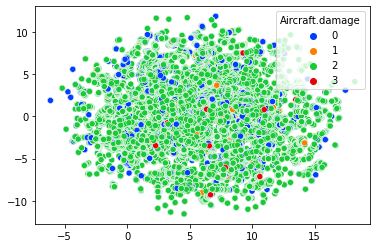

In [80]:
# create a scatter plot of the UMAP embeddings with different colors for each label
sns.scatterplot(x=umap_embeddings[:,0], y=umap_embeddings[:,1], hue=y, palette='bright')

### Visualization of data in 2D plane using t-SNE

The t-SNE algorithm comprises two main stages. First, t-SNE constructs a probability distribution over pairs of high-dimensional objects in such a way that similar objects are assigned a higher probability while dissimilar points are assigned a lower probability. Second, t-SNE defines a similar probability distribution over the points in the low-dimensional map, and it minimizes the Kullback–Leibler divergence (KL divergence) between the two distributions with respect to the locations of the points in the map. While the original algorithm uses the Euclidean distance between objects as the base of its similarity metric, this can be changed as appropriate.

#### for high dimension:
Distribution used is Gaussian with a small variance, which means that only nearby points have a high probability of being selected.

#### for low dimension:
Distribution used is t-student with a large variance, which means that far away points also have a high probability of being selected.

In [84]:
from sklearn.manifold import TSNE

C:\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


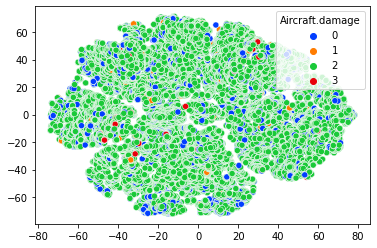

In [85]:
# apply t-SNE to the features
tsne_embeddings = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(X)

# create a scatter plot of the t-SNE embeddings with different colors for each label
sns.scatterplot(x=tsne_embeddings[:,0], y=tsne_embeddings[:,1], hue=y, palette='bright')
plt.show()

### Visualization of data in 2D plane using PCA

In [86]:
from sklearn.decomposition import PCA

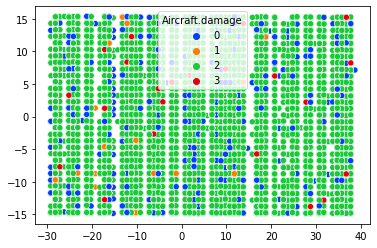

In [87]:
# apply PCA to the features
pca_embeddings = PCA(n_components=2, random_state=42).fit_transform(X)

# create a scatter plot of the PCA embeddings with different colors for each label
sns.scatterplot(x=pca_embeddings[:,0], y=pca_embeddings[:,1], hue=y, palette='bright')
plt.show()

# Classification

In [81]:
from sklearn.model_selection import KFold

### 1. Logistic Regression

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [83]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [85]:
logisticRegression = LogisticRegression(random_state=42, max_iter=1000)
logisticRegression.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [88]:
y_pred = logisticRegression.predict(X_test)

In [89]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.86


In [90]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.50      0.06      0.11       874
           1       0.00      0.00      0.00        60
           2       0.87      0.99      0.93      6037
           3       0.00      0.00      0.00        10

    accuracy                           0.86      6981
   macro avg       0.34      0.26      0.26      6981
weighted avg       0.82      0.86      0.81      6981



C:\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [91]:
from sklearn.metrics import confusion_matrix

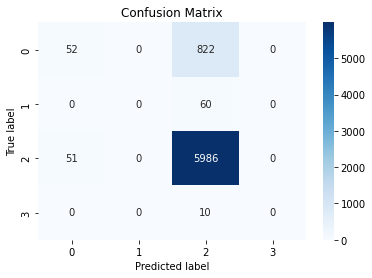

In [92]:
# create a confusion matrix of the predictions
conf_mat = confusion_matrix(y_test, y_pred)

# plot the confusion matrix using a heatmap
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

### k-fold validation with k = 5

In [94]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

In [103]:
metrics = {'precision': [], 'recall': [], 'f1-score': [], 'support': []}

for train_idx, test_idx in k_fold.split(X):
    _X_train, _X_test = X.iloc[train_idx], X.iloc[test_idx]
    _y_train, _y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    logisticRegression.fit(_X_train, _y_train)
    
    _y_pred = logisticRegression.predict(_X_test)
    
    report = classification_report(_y_test, _y_pred, output_dict=True)
    
    for metric in metrics:
        metrics[metric].append(report['macro avg'][metric])

avg_metrics = {metric: np.mean(metrics[metric]) for metric in metrics}

print('Average metrics over 5-fold cross-validation:')
for metric in avg_metrics:
    print(f'{metric}: {avg_metrics[metric]:.3f}')

C:\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no pred

Average metrics over 5-fold cross-validation:
precision: 0.313
recall: 0.256
f1-score: 0.246
support: 6980.800


C:\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no pred

### 2. Support Vector Machine

In [104]:
from sklearn.svm import SVC

#### kernel used = linear

In [105]:
# train an SVM model on the training set
svm_linear = SVC(kernel='linear', C=1, random_state=42)
svm_linear.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=42)

In [106]:
# make predictions on the testing set
y_pred = svm_linear.predict(X_test)

In [107]:
# evaluate the performance of the model using accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.86


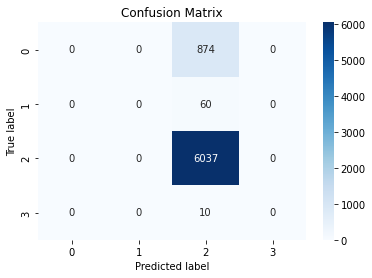

In [108]:
# create a confusion matrix of the predictions
conf_mat = confusion_matrix(y_test, y_pred)

# plot the confusion matrix using a heatmap
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

#### kernel used = Radial Basis Function

In [109]:
svm_rbf = SVC(kernel='rbf', C=1, random_state=42)
svm_rbf.fit(X_train, y_train)

SVC(C=1, random_state=42)

In [111]:
y_pred = svm_rbf.predict(X_test)

In [112]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.87


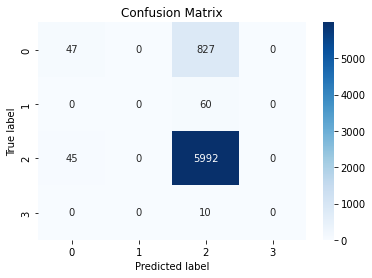

In [113]:
# create a confusion matrix of the predictions
conf_mat = confusion_matrix(y_test, y_pred)

# plot the confusion matrix using a heatmap
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

### k-fold validation

In [114]:
metrics = {'precision': [], 'recall': [], 'f1-score': [], 'support': []}
accuracy = 0

#### Training loop (linear kernel)

In [115]:
for train_idx, test_idx in k_fold.split(X):
    
    _X_train, _X_test = X.iloc[train_idx], X.iloc[test_idx]
    _y_train, _y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    svm_linear.fit(X_train, y_train)
    
    _y_pred = svm_linear.predict(_X_test)
    
    report = classification_report(_y_test, _y_pred, output_dict=True)
    accuracy += accuracy_score(_y_test, _y_pred)
    
    for metric in metrics:
        metrics[metric].append(report['macro avg'][metric])

avg_metrics = {metric: np.mean(metrics[metric]) for metric in metrics}

C:\Python\Python39\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c

In [116]:
print('Average metrics over 5-fold cross-validation:')
for metric in avg_metrics:
    print(f'{metric}: {avg_metrics[metric]:.3f}')
    
print("Accuracy: ", accuracy/5)

Average metrics over 5-fold cross-validation:
precision: 0.000
recall: 0.250
f1-score: 0.001
support: 6980.800


In [117]:
metrics = {'precision': [], 'recall': [], 'f1-score': [], 'support': []}
accuracy = 0

#### Training loop (rbf kernel)

In [118]:
for train_idx, test_idx in k_fold.split(X):
    
    _X_train, _X_test = X.iloc[train_idx], X.iloc[test_idx]
    _y_train, _y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    svm_rbf.fit(X_train, y_train)
    
    _y_pred = svm_rbf.predict(_X_test)
    
    report = classification_report(_y_test, _y_pred, output_dict=True)
    accuracy += accuracy_score(_y_test, _y_pred)
    
    for metric in metrics:
        metrics[metric].append(report['macro avg'][metric])

avg_metrics = {metric: np.mean(metrics[metric]) for metric in metrics}

C:\Python\Python39\lib\site-packages\sklearn\base.py:434: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
C:\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to c

In [119]:
print('Average metrics over 5-fold cross-validation:')
for metric in avg_metrics:
    print(f'{metric}: {avg_metrics[metric]:.3f}')

print("Accuracy: ", accuracy / 5)

Average metrics over 5-fold cross-validation:
precision: 0.216
recall: 0.250
f1-score: 0.232
support: 6980.800
Accuracy:  0.17301246239793727
